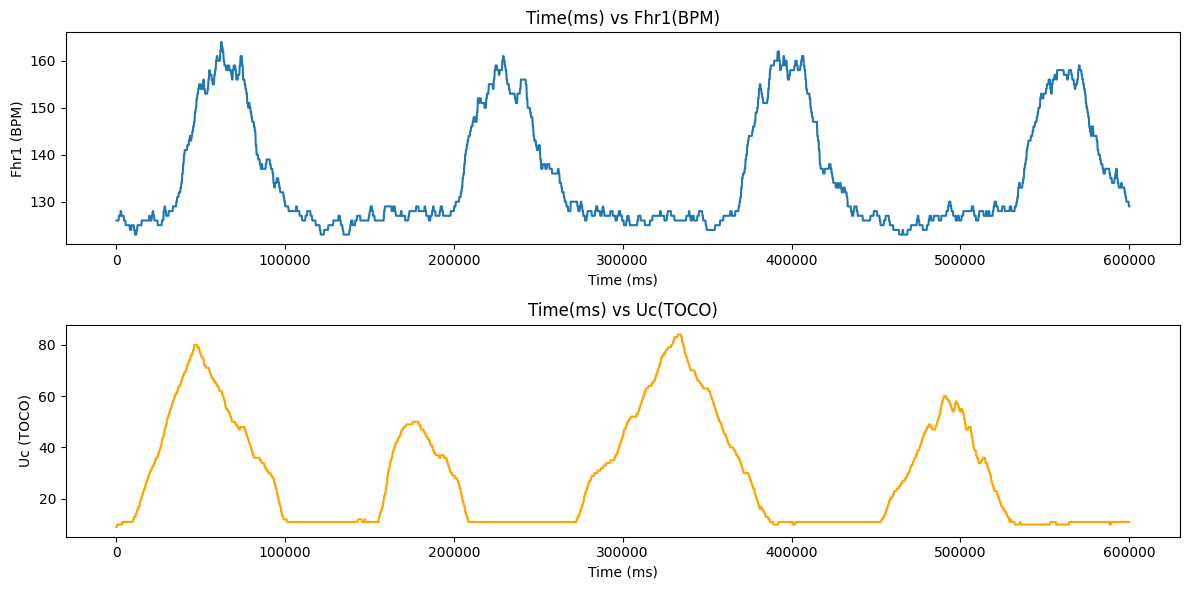

Number of wide peaks: 4
Average duration of wide peaks: 45343.75 ms


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Load data from CSV
data = pd.read_csv('/content/sample_data/Simulator_readings.csv')

# Plotting FHR1 and UC graphs
plt.figure(figsize=(12, 6))

# Time(ms) vs Fhr1(BPM)
plt.subplot(2, 1, 1)
plt.plot(data['Time(ms)'], data['Fhr1(BPM)'], label="FHR1")
plt.title('Time(ms) vs Fhr1(BPM)')
plt.xlabel('Time (ms)')
plt.ylabel('Fhr1 (BPM)')

# Time(ms) vs Uc(TOCO)
plt.subplot(2, 1, 2)
plt.plot(data['Time(ms)'], data['Uc(TOCO)'], label="UC", color='orange')
plt.title('Time(ms) vs Uc(TOCO)')
plt.xlabel('Time (ms)')
plt.ylabel('Uc (TOCO)')

plt.tight_layout()
plt.show()

# FHR Analysis (Dividing into epochs of 3.75 seconds)
epoch_duration_ms = 3750  # 3.75 seconds in milliseconds
epochs = data.groupby(data['Time(ms)'] // epoch_duration_ms)

# Calculating average FHR1 and pulse interval for each epoch
average_fhr = epochs['Fhr1(BPM)'].mean()
pulse_intervals = 60000 / average_fhr  # Pulse interval in milliseconds

# UC Peak Detection
uc_peaks, properties = find_peaks(data['Uc(TOCO)'], height=9, width =1)  # Adjust height threshold as needed

# Peak width at half max height
peak_widths = properties['widths'] * 250  # Convert to milliseconds (each interval is 250 ms)
wide_peaks = peak_widths[peak_widths > 30000]  # Peaks wider than 30 seconds

# Calculate average duration of wide peaks
average_peak_duration = wide_peaks.mean() if len(wide_peaks) > 0 else 0

# Output the results
print(f'Number of wide peaks: {len(wide_peaks)}')
print(f'Average duration of wide peaks: {average_peak_duration} ms')